## The cart pole problem
![cart pole](../../../../img/cart_pole_system.png " ")

## Below you can find the calculations to solve model control problem

In [ ]:
from sympy import Symbol, cos, sin, Rational, Matrix, Equality, simplify
from sympy.physics.mechanics import dynamicsymbols, mechanics_printing
from IPython.display import display

mechanics_printing()

time = Symbol("t")
cart_position = dynamicsymbols("x")
pole_angle = dynamicsymbols("theta")
cart_velocity = cart_position.diff()
pole_angular_velocity = pole_angle.diff()
pendulums_length = Symbol("l")
pendulum_mass_kg = Symbol("m")
pole_inertia = Symbol("i_p")
cart_mass_kg = Symbol("m_c")
g = Symbol("g")

x_pole_position = cart_position + pendulums_length * sin(pole_angle)
y_pole_position = pendulums_length * cos(pole_angle)

x_velocity_position = x_pole_position.diff(time)
y_velocity_position = y_pole_position.diff(time)

display(x_velocity_position)
display(y_velocity_position)

x_accelerations = x_velocity_position.diff(time)
y_accelerations = y_velocity_position.diff(time)

display(x_accelerations)
display(y_accelerations)


## Velocities and accelerations of pendulum's end  
$$
\dot{x_p} = l \cos{\left(\theta \right)} \dot{\theta} + \dot{x}
$$

$$
\dot{y_p} = - l \sin{\left(\theta \right)} \dot{\theta}
$$

$$
\ddot{x_p} = - l \sin{\left(\theta \right)} \dot{\theta}^{2} + l \cos{\left(\theta \right)} \ddot{\theta} + \ddot{x}
$$

$$
\ddot{y_p} = - l \sin{\left(\theta \right)} \ddot{\\theta} - l \cos{\left(\theta \right)} \dot{\theta}^{2}
$$

In [ ]:
velocity = (x_velocity_position**2 + y_velocity_position**2).simplify()
pole_kinetic_energy = (
    Rational(1, 2) * pendulum_mass_kg * velocity + Rational(1, 2) * pole_inertia * pole_angular_velocity**2
)
cart_kinetic_energy = Rational(1, 2) * cart_mass_kg * (cart_velocity**2)
kinetic_energy = Matrix([pole_kinetic_energy, cart_kinetic_energy])

display(kinetic_energy)

potential_energy = Matrix([pendulum_mass_kg * g * pendulums_length * cos(pole_angle), 0])
display(potential_energy)

## Pendulum's energies

$$
K = \left[\begin{matrix}\frac{i_{p} \dot{\theta}^{2}}{2} + \frac{m \left(l^{2} \dot{\theta}^{2} + 2 l \cos{\left(\theta \right)} \dot{\theta} \dot{x} + \dot{x}^{2}\right)}{2}\\\frac{m_{c} \dot{x}^{2}}{2}\end{matrix}\right]
$$
$$
V = \left[\begin{matrix}g l m \cos{\left(\theta \right)}\\0\end{matrix}\right]
$$

In [ ]:
lagrangian = kinetic_energy[0] + kinetic_energy[1] - potential_energy[0] - potential_energy[1]
display(lagrangian)

## Lagrangian

$$
L = K - V
$$

$$
L = - g l m \cos{\left(\theta \right)} + \frac{i_{p} \dot{\theta}^{2}}{2} + \frac{m \left(l^{2} \dot{\theta}^{2} + 2 l \cos{\left(\theta \right)} \dot{\theta} \dot{x} + \dot{x}^{2}\right)}{2} + \frac{m_{c} \dot{x}^{2}}{2}
$$

In [ ]:
q = Matrix([cart_position, pole_angle])
qd = Matrix([cart_velocity, pole_angular_velocity])
d_lagrangian_dx = lagrangian.diff(q)
d_lagrangian_ddx = lagrangian.diff(qd)
d_lagrangian_ddx_dt = d_lagrangian_ddx.diff(time)

lagrangian_equation = d_lagrangian_ddx_dt - d_lagrangian_dx
display(lagrangian_equation)

### Lagrange's equations

$$
L = \left[\begin{matrix}\frac{m \left(- 2 l \sin{\left(\theta \right)} \dot{\theta}^{2} + 2 l \cos{\left(\theta \right)} \ddot{\theta} + 2 \ddot{x}\right)}{2} + m_{c} \ddot{x}\\- g l m \sin{\left(\theta \right)} + i_{p} \ddot{\theta} + l m \sin{\left(\theta \right)} \dot{\theta} \dot{x} + \frac{m \left(2 l^{2} \ddot{\theta} - 2 l \sin{\left(\theta \right)} \dot{\theta} \dot{x} + 2 l \cos{\left(\theta \right)} \ddot{x}\right)}{2}\end{matrix}\right]
$$


In [ ]:

control_function = Symbol("f")
q2_lagrangian_equation = Equality(lagrangian_equation[1].simplify(), 0)
display(q2_lagrangian_equation)
angular_accelerations_coefficients = q2_lagrangian_equation.lhs.coeff(pole_angular_velocity.diff())
q2_lagrangian_equation = Equality(q2_lagrangian_equation.lhs - angular_accelerations_coefficients * pole_angular_velocity.diff(), q2_lagrangian_equation.rhs - angular_accelerations_coefficients * pole_angular_velocity.diff()).simplify()
display(q2_lagrangian_equation)
q2_lagrangian_equation = Equality(q2_lagrangian_equation.lhs  / angular_accelerations_coefficients, q2_lagrangian_equation.rhs / angular_accelerations_coefficients).simplify()
display(q2_lagrangian_equation)

q1_lagrangian_equation = Equality(lagrangian_equation[0].expand(), control_function)
display(q1_lagrangian_equation)
q1_lagrangian_equation = q1_lagrangian_equation.subs(pole_angular_velocity.diff(), q2_lagrangian_equation.rhs.simplify())
display(q1_lagrangian_equation)
q1_lagrangian_equation = Equality(q1_lagrangian_equation.lhs - control_function, q1_lagrangian_equation.rhs - control_function)
display(q1_lagrangian_equation)
q1_lagrangian_equation = Equality(q1_lagrangian_equation.lhs.expand(), q1_lagrangian_equation.rhs)
display(q1_lagrangian_equation)
cart_accelerations_coefficients = q1_lagrangian_equation.lhs.coeff(cart_velocity.diff())
q1_lagrangian_equation = Equality(q1_lagrangian_equation.lhs - cart_accelerations_coefficients*cart_velocity.diff(), q1_lagrangian_equation.rhs - cart_accelerations_coefficients*cart_velocity.diff())
display(q1_lagrangian_equation)
q1_lagrangian_equation = Equality(q1_lagrangian_equation.lhs / cart_accelerations_coefficients, q1_lagrangian_equation.rhs / cart_accelerations_coefficients).simplify()
display(q1_lagrangian_equation)

q2_lagrangian_equation = q2_lagrangian_equation.subs(cart_velocity.diff(), q1_lagrangian_equation.rhs).simplify()
display(q1_lagrangian_equation)


## Transforming Lagrange's equations

Given following equations where **f** is cart momentum:

$$
- l m \sin{\left(\theta \right)} \dot{\theta}^{2} + l m \cos{\left(\theta \right)} \ddot{\theta} + m \ddot{x} + m_{c} \ddot{x} = f
$$

$$
- g l m \sin{\left(\theta \right)} + i_{p} \ddot{\theta} + l^{2} m \ddot{\theta} + l m \cos{\left(\theta \right)} \ddot{x} = 0
$$


Using given equations the $\dot{X}$ will be derived:
$$
\dot{X} = 
\left[\begin{matrix}\dot{x}\\\dot{\theta}\\\ddot{x}\\\ddot{\theta}\end{matrix}\right]
$$


Transforming second equation:

$$
- g l m \sin{\left(\theta \right)} + i_{p} \ddot{\theta} + l^{2} m \ddot{\theta} + l m \cos{\left(\theta \right)} \ddot{x} = 0
$$

$$
\left(i_{p} + l^{2} m\right) \ddot{\theta} = - l m \left(- g \sin{\left(\theta \right)} + \cos{\left(\theta \right)} \ddot{x}\right)
$$

$$
\ddot{\theta} = \frac{l m \left(g \sin{\left(\theta \right)} - \cos{\left(\theta \right)} \ddot{x}\right)}{i_{p} + l^{2} m}
$$


Transforming first equation and substitute second equation as $\ddot{\theta}$

$$
\frac{l^{2} m^{2} \left(g \sin{\left(\theta \right)} - \cos{\left(\theta \right)} \ddot{x}\right) \cos{\left(\theta \right)}}{i_{p} + l^{2} m} - l m \sin{\left(\theta \right)} \dot{\theta}^{2} + m \ddot{x} + m_{c} \ddot{x} = f
$$

$$
- f + \frac{l^{2} m^{2} \left(g \sin{\left(\theta \right)} - \cos{\left(\theta \right)} \ddot{x}\right) \cos{\left(\theta \right)}}{i_{p} + l^{2} m} - l m \sin{\left(\theta \right)} \dot{\theta}^{2} + m \ddot{x} + m_{c} \ddot{x} = 0
$$

$$
- f + \frac{g l^{2} m^{2} \sin{\left(\theta \right)} \cos{\left(\theta \right)}}{i_{p} + l^{2} m} - \frac{l^{2} m^{2} \cos^{2}{\left(\theta \right)} \ddot{x}}{i_{p} + l^{2} m} - l m \sin{\left(\theta \right)} \dot{\theta}^{2} + m \ddot{x} + m_{c} \ddot{x} = 0
$$
$$
- f + \frac{g l^{2} m^{2} \sin{\left(\theta \right)} \cos{\left(\theta \right)}}{i_{p} + l^{2} m} - \frac{l^{2} m^{2} \cos^{2}{\left(\theta \right)} \ddot{x}}{i_{p} + l^{2} m} - l m \sin{\left(\theta \right)} \dot{\theta}^{2} + m \ddot{x} + m_{c} \ddot{x} - \left(- \frac{l^{2} m^{2} \cos^{2}{\left(\theta \right)}}{i_{p} + l^{2} m} + m + m_{c}\right) \ddot{x} = - \left(- \frac{l^{2} m^{2} \cos^{2}{\left(\theta \right)}}{i_{p} + l^{2} m} + m + m_{c}\right) \ddot{x}
$$

After substituting the $\ddot{x}$ to the second equation we get:

$$
\ddot{x} = - \frac{- f i_{p} - f l^{2} m + \frac{g l^{2} m^{2} \sin{\left(2 \theta \right)}}{2} - i_{p} l m \sin{\left(\theta \right)} \dot{\theta}^{2} - l^{3} m^{2} \sin{\left(\theta \right)} \dot{\theta}^{2}}{i_{p} m + i_{p} m_{c} + l^{2} m^{2} \sin^{2}{\left(\theta \right)} + l^{2} m m_{c}}
$$

$$
\ddot{\theta} = \frac{l m \left(2 g \left(i_{p} m + i_{p} m_{c} + l^{2} m^{2} \sin^{2}{\left(\theta \right)} + l^{2} m m_{c}\right) \sin{\left(\theta \right)} - \left(2 f i_{p} + 2 f l^{2} m - g l^{2} m^{2} \sin{\left(2 \theta \right)} + 2 i_{p} l m \sin{\left(\theta \right)} \dot{\theta}^{2} + 2 l^{3} m^{2} \sin{\left(\theta \right)} \dot{\theta}^{2}\right) \cos{\left(\theta \right)}\right)}{2 \left(i_{p} + l^{2} m\right) \left(i_{p} m + i_{p} m_{c} + l^{2} m^{2} \sin^{2}{\left(\theta \right)} + l^{2} m m_{c}\right)}
$$


We can rewrite it as:

$$

\dot{X} = 
\left[\begin{matrix}\dot{x}\\\dot{\theta}\\\ddot{x}\\\ddot{\theta}\end{matrix}\right]
= \left[\begin{matrix}\dot{x}\\\dot{\theta}\\ - \frac{- f i_{p} - f l^{2} m + \frac{g l^{2} m^{2} \sin{\left(2 \theta \right)}}{2} - i_{p} l m \sin{\left(\theta \right)} \dot{\theta}^{2} - l^{3} m^{2} \sin{\left(\theta \right)} \dot{\theta}^{2}}{i_{p} m + i_{p} m_{c} + l^{2} m^{2} \sin^{2}{\left(\theta \right)} + l^{2} m m_{c}} \\ 
\frac{l m \left(2 g \left(i_{p} m + i_{p} m_{c} + l^{2} m^{2} \sin^{2}{\left(\theta \right)} + l^{2} m m_{c}\right) \sin{\left(\theta \right)} - \left(2 f i_{p} + 2 f l^{2} m - g l^{2} m^{2} \sin{\left(2 \theta \right)} + 2 i_{p} l m \sin{\left(\theta \right)} \dot{\theta}^{2} + 2 l^{3} m^{2} \sin{\left(\theta \right)} \dot{\theta}^{2}\right) \cos{\left(\theta \right)}\right)}{2 \left(i_{p} + l^{2} m\right) \left(i_{p} m + i_{p} m_{c} + l^{2} m^{2} \sin^{2}{\left(\theta \right)} + l^{2} m m_{c}\right)} \end{matrix}\right]

$$


## Linearization in the equilibrium point

### Calculate the jacobian in respect to state matrix and input function to obtain state matrix and input vector

### Use 0 as value for the pole_angle/$\theta$   


In [ ]:
state_derivative = Matrix([cart_velocity, pole_angular_velocity, q1_lagrangian_equation.rhs.expand(), q2_lagrangian_equation.rhs.simplify()])
state_matrix = state_derivative.jacobian([cart_position, pole_angle, cart_velocity, pole_angular_velocity]).subs(pole_angle, 0)
input_matrix = state_derivative.jacobian([control_function]).subs(pole_angle, 0)

display(simplify(Matrix(state_matrix)))
display(simplify(Matrix(input_matrix)))

## In result we get


$$

\left[\begin{matrix}\dot{x}\\\dot{\theta}\\\ddot{x}\\\ddot{\theta}\end{matrix}\right]
= 
\left[\begin{matrix}0 & 0 & 1 & 0\\0 & 0 & 0 & 1\\0 & - \frac{g l^{2} m^{2}}{i_{p} m + i_{p} m_{c} + l^{2} m m_{c}} & 0 & 0\\0 & \frac{l m \left(g m + g m_{c}\right)}{i_{p} m + i_{p} m_{c} + l^{2} m m_{c}} & 0 & 0\end{matrix}\right]  \left[\begin{matrix}x\\\theta\\\dot{x}\\\dot{\theta}\end{matrix}\right] + \left[\begin{matrix}0\\0\\\frac{i_{p} + l^{2} m}{i_{p} m + i_{p} m_{c} + l^{2} m m_{c}}\\- \frac{l m}{i_{p} m + i_{p} m_{c} + l^{2} m m_{c}}\end{matrix}\right] f

$$


## Controller creation 

Using pole placement method to create controller.

In [2]:
import numpy as np
import control
from scipy.signal import lsim, lti
import matplotlib.pyplot as plt

def get_state_matrix(length_to_pendulums_center_mass, pendulum_mass_kg, cart_mass_kg, pole_inertia):
    g = 9.81
    return np.array(
        [
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [
                0,
                -g
                * length_to_pendulums_center_mass**2
                * pendulum_mass_kg**2
                / (
                    pole_inertia * cart_mass_kg
                    + pole_inertia * pendulum_mass_kg
                    + cart_mass_kg * length_to_pendulums_center_mass**2 * pendulum_mass_kg
                ),
                0,
                0,
            ],
            [
                0,
                g
                * length_to_pendulums_center_mass
                * pendulum_mass_kg
                * (cart_mass_kg + pendulum_mass_kg)
                / (
                    pole_inertia * cart_mass_kg
                    + pole_inertia * pendulum_mass_kg
                    + cart_mass_kg * length_to_pendulums_center_mass**2 * pendulum_mass_kg
                ),
                0,
                0,
            ],
        ]
    )


def get_input_matrix(length_to_pendulums_center_mass, pendulum_mass_kg, cart_mass_kg, pole_inertia):
    return np.array(
        [
            [0],
            [0],
            [
                (-pole_inertia - length_to_pendulums_center_mass**2 * pendulum_mass_kg)
                / (
                    -pole_inertia * cart_mass_kg
                    - pole_inertia * pendulum_mass_kg
                    - cart_mass_kg * length_to_pendulums_center_mass**2 * pendulum_mass_kg
                )
            ],
            [
                length_to_pendulums_center_mass
                * pendulum_mass_kg
                / (
                    -pole_inertia * cart_mass_kg
                    - pole_inertia * pendulum_mass_kg
                    - cart_mass_kg * length_to_pendulums_center_mass**2 * pendulum_mass_kg
                )
            ],
        ]
    )


In [3]:
pendulum_mass_kg = 0.455
cart_mass_kg = 1.006
length_to_pendulums_center_mass = 0.435057
pole_inertia = 0.044096

state_matrix = get_state_matrix(length_to_pendulums_center_mass, pendulum_mass_kg, cart_mass_kg, pole_inertia)
input_matrix = get_input_matrix(length_to_pendulums_center_mass, pendulum_mass_kg, cart_mass_kg, pole_inertia)
controllability_matrix = control.ctrb(state_matrix, input_matrix)


print(f"Controllability matrix's rank: {np.linalg.matrix_rank(controllability_matrix, tol=1.0e-10)}")
print(f"Eigen values of state matrix (A): {np.linalg.eigvals(state_matrix)}")

Controllability matrix's rank: 4
Eigen values of state matrix (A): [ 0.          0.          4.33373483 -4.33373483]


In [4]:
poles = [-1, -2, -3, -4]
controller = control.place(state_matrix, input_matrix, poles)
print(f"Controller (K): {controller}")

state_matrix_new_eigen_values = state_matrix - input_matrix @ controller
print(f"System with new eigen values after adding controller: {np.linalg.eigvals(state_matrix_new_eigen_values)}")

controllability_matrix_with_new_eigen_values = control.ctrb(state_matrix_new_eigen_values, input_matrix)
print(
    f"Controllability matrix's rank: {np.linalg.matrix_rank(controllability_matrix_with_new_eigen_values, tol=1.0e-10)}"
)

Controller (K): [[ -1.86696764 -42.26984303  -3.88951591 -10.18982873]]
System with new eigen values after adding controller: [-4. -3. -2. -1.]
Controllability matrix's rank: 4


In [5]:
states_used_in_control_loop = np.array([0, 1, 0, 1])
state_vector = np.array([0.5, 0.1, 0, 0.1])

print(f"State: {state_vector}")
print(f"States to use in controller: {states_used_in_control_loop}")
print(f"Controller with certain states being used: {controller * states_used_in_control_loop}")
print(f"Controller's: {np.dot(controller * states_used_in_control_loop, state_vector)}")

State: [0.5 0.1 0.  0.1]
States to use in controller: [0 1 0 1]
Controller with certain states being used: [[ -0.         -42.26984303  -0.         -10.18982873]]
Controller's: [-5.24596718]


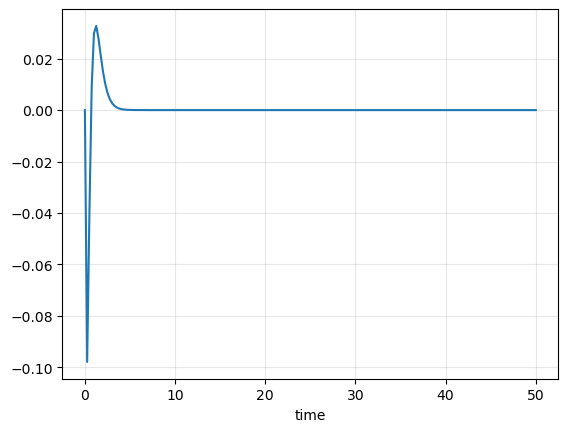

In [6]:
D = 0.0
system = lti(state_matrix_new_eigen_values, input_matrix, states_used_in_control_loop, D)
time = np.linspace(0, 50, num=200)
u = np.ones_like(time)
_, y, x = lsim(system, u, time)
plt.plot(time, y)
plt.grid(alpha=0.3)
plt.xlabel("time")
plt.show()